# **Classes and Objects**

**Programmer-Defined Types**

In mathematical notation, points are often written in parentheses with a comma
separating the coordinates. 

For example, (0,0) represents the origin, and (x,y) represents the point x units to the right and y units up from the origin.

There are several ways we might represent points in Python:

    We could store the coordinates separately in two variables, x and y.

    We could store the coordinates as elements in a list or tuple.

    We could create a new type to represent points as objects.
    
Creating a new type is more complicated than the other options, but it has
advantages that will be apparent soon.

A programmer-defined type is also called a **CLASS**. 

A **CLASS** definition looks like this:

**class Point:**

"""Represents a point in 2-D space."""

The header indicates that the new class is called Point. 

The body is a docstring that explains what the class is for. 

**Variables** and **Methods**  can be defined  inside a class definition.

Defining a class named **Point** creates a class object:

# >>> Point
<class '__main__.Point'>

Because Point is defined at the top level, its “full name” is __main__.Point.

The class object is like a factory for creating objects. 

To create a Point,  Point can be called  as if it were a function:

# >>> blank = Point()
# >>> blank
<__main__.Point object at 0xb7e9d3ac>

The return value is a reference to a Point object, which is assigned to blank.

Creating a new object is called **instantiation**, and the **object** is an **instance of** the **class**.

# **Attributes**
An instance  can be assigned values using dot notation:

# >>> blank.x = 3.0
# >>> blank.y = 4.0

This syntax is similar to the syntax for selecting a variable from a module, such as **math.pi** or **string.whitespace**. 

In this case, though, values are assigned  to named elements of an object.

These elements are called **attributes**.

As a noun, “AT-trib-ute” is pronounced with emphasis on the first syllable, as
opposed to “a-TRIB-ute”, which is a verb.

The following diagram shows the result of these assignments. 

A state diagram that shows an object and its attributes is called an object diagram; see Figure 15-1.

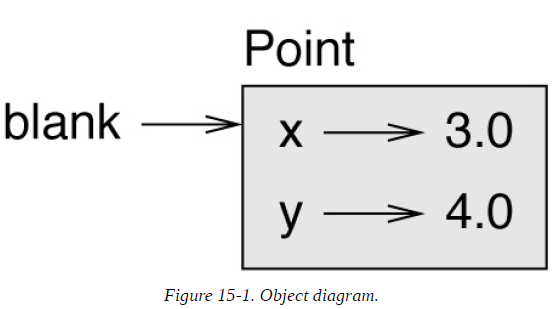

The variable blank refers to a Point object, which contains two attributes. Each
attribute refers to a floating-point number.

 The value of an attribute  can be read  using the same syntax:

# >>> blank.y
4.0

# >>> x = blank.x
# >>> x
3.0

The expression blank.x means, “Go to the object blank refers to and get the
value of x.” 

In the example, we assign that value to a variable named x. 

There is no conflict between the variable x and the attribute x.

dot notation as part of any expression  can be used. 

For example:

# >>> '(%g, %g)' % (blank.x, blank.y)
'(3.0, 4.0)'

# >>> distance = math.sqrt(blank.x**2 + blank.y**2)
# >>> distance

5.0

An instance  can be passed  as an argument in the usual way. 

For example:

def print_point(p):

print('(%g, %g)' % (p.x, p.y))

print_point takes a point as an argument and displays it in mathematical notation. 

To invoke it, blank  can be passed  as an argument:

# >>> print_point(blank)

(3.0, 4.0)

Inside the function, p is an alias for blank, so if the function modifies p, blank changes.

As an exercise, write a function called distance_between_points that takes two
Points as arguments and returns the distance between them.

# **Rectangles**
Sometimes it is obvious what the attributes of an object should be, but other
times decisions are to be made. 

For example, imagine a class to represent rectangles is being designed . 

What attributes should be used to specify the location and size of a rectangle? 

Angle  can be ignored; to keep things simple, assume that the rectangle is either vertical or horizontal.

There are at least two possibilities:

    One corner of the rectangle  could be specified  (or the center), the   
    width, and the height.

    Two opposite corners  could be specified .

At this point it is hard to say whether either is better than the other, so we’ll implement the first one, just as an example.

Here is the class definition:

class Rectangle:
"""Represents a rectangle.
attributes: width, height, corner.
"""

The docstring lists the attributes: width and height are numbers; corner is a
Point object that specifies the lower-left corner.

To represent a rectangle, you have to instantiate a Rectangle object and assign
values to the attributes:

box = Rectangle()

box.width = 100.0

box.height = 200.0

box.corner = Point()

box.corner.x = 0.0

box.corner.y = 0.0

The expression box.corner.x means, “Go to the object box refers to and select
the attribute named corner; then go to that object and select the attribute named x.”

Figure 15-2 shows the state of this object. 

An object that is an attribute of another object is embedded.

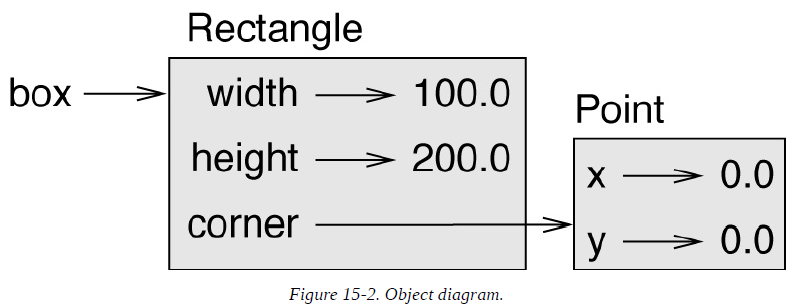



# **Instances as Return Values**
Functions can return instances. 

For example, find_center takes a Rectangle as an argument and returns a Point that contains the coordinates of the center of the Rectangle: 

def find_center(rect): 
  p = Point() 
  p.x = rect.corner.x + rect.width/2
  p.y = rect.corner.y + rect.height/2
  return p

Here is an example that passes box as an argument and assigns the resulting
Point to center:

# >>> center = find_center(box)
# >>> print_point(center)
(50, 100)

# **Objects Are Mutable**
The state of an object  can be changed  by making an assignment to one of its
attributes. 

For example, to change the size of a rectangle without changing its position,  the values of width and height can be modified : 

box.width = box.width + 50 

box.height = box.height + 100

Functions  can also be writen  that modify objects. 

For example, grow_rectangle takes a Rectangle object and two numbers, dwidth and dheight, and adds the numbers to the width and height of the rectangle:

def grow_rectangle(rect, dwidth, dheight): 

  rect.width += dwidth

  rect.height += dheight

Here is an example that demonstrates the effect:

# >>> box.width, box.height

(150.0, 300.0)

# >>> grow_rectangle(box, 50, 100)
# >>> box.width, box.height

(200.0, 400.0)

Inside the function, rect is an alias for box, so when the function modifies rect, box changes.

**Class Activity**:

As an exercise, write a function named move_rectangle that takes a Rectangle
and two numbers named dx and dy. 

It should change the location of the rectangle by adding dx to the x coordinate of corner and adding dy to the y coordinate of corner.

# **Copying**
Aliasing can make a program difficult to read because changes in one place might have unexpected effects in another place. 

It is hard to keep track of all the variables that might refer to a given object.

Copying an object is often an alternative to aliasing. 

The copy module contains a function called copy that can duplicate any object:

# >>> p1 = Point()

# >>> p1.x = 3.0

# >>> p1.y = 4.0

# >>> import copy

# >>> p2 = copy.copy(p1)

p1 and p2 contain the same data, but they are not the same Point:

# >>> print_point(p1)

(3, 4)

# >>> print_point(p2)

(3, 4)

# >>> p1 is p2

False

# >>> p1 == p2

False

The is operator indicates that p1 and p2 are not the same object, which is what
was expected. 

But it might be expected == to yield True because these points contain the same data. 

In that case,  for instances, the default behavior of the == operator is the same as the is operator; **it checks object identity, not object equivalence**. 

That’s because for programmerdefined types, Python doesn’t know what should be considered equivalent. 

If  copy.copy to duplicate a Rectangle is used, then it copies the Rectangle object but not the embedded Point:

# >>> box2 = copy.copy(box)

# >>> box2 is box

False

# >>> box2.corner is box.corner

True


Figure 15-3 shows what the object diagram looks like. 

This operation is called a shallow copy because it copies the object and any references it contains, but not the embedded objects.

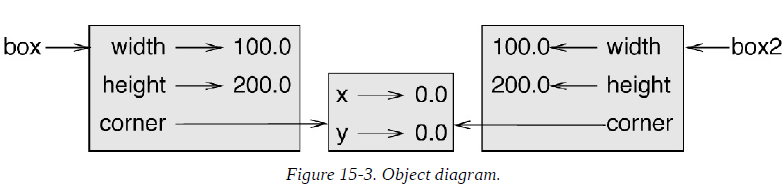



In this example, invoking grow_rectangle on one of the Rectangles would not affect the other, but invoking move_rectangle on either would affect both! 

This behavior is confusing and error-prone.

Fortunately, the **copy module** provides **a method named deepcopy** that copies **not only the object** but also **the objects it refers to**, and the **objects they refer to**, and so on.

This operation is called a **deep copy**.

# >>> box3 = copy.deepcopy(box)

# >>> box3 is box

False

# >>> box3.corner is box.corner

False

box3 and box are completely separate objects.

**Class Exercise**:

As an exercise, write a version of move_rectangle that creates and returns a new
Rectangle instead of modifying the old one.


# **Glossary**
**class**:
A programmer-defined type. A class definition creates a new class object.

**class object**:
An object that contains information about a programmer-defined type. 

The class object can be used to create instances of the type.

**instance**:
An object that belongs to a class.

**instantiate**:
To create a new object.

**attribute**:
One of the named values associated with an object.

**embedded object**:
An object that is stored as an attribute of another object.

**shallow copy**:
To copy the contents of an object, including any references to embedded
objects; implemented by **the copy function in the copy module**.

**deep copy**:
To copy the contents of an object as well as any embedded objects, and any
objects embedded in them, and so on; implemented by the **deepcopy**
function in the **copy module**.

**object diagram**:
A diagram that shows objects, their attributes, and the values of the
attributes.


# **Post Class Exercises**:

# 1. 

Write a definition for a class named Circle with attributes center and radius,
where center is a Point object and radius is a number.

Instantiate a Circle object that represents a circle with its center at (0, 0)
and radius 75.

Write a function named point_in_circle that takes a Circle and a Point and
returns True if the Point lies in or on the boundary of the circle.

Write a function named rect_in_circle that takes a Circle and a Rectangle and
returns True if the Rectangle lies entirely in or on the boundary of the circle.

Write a function named rect_circle_overlap that takes a Circle and a Rectangle and returns True if any of the corners of the Rectangle fall inside the circle.

Or as a more challenging version, return True if any part of the Rectangle
falls inside the circle.

# 2. 

Write a function called draw_rect that takes a Turtle object and a Rectangle and
uses the Turtle to draw the Rectangle. 

Write a function called draw_circle that takes a Turtle and a Circle and draws
the Circle.

In [ ]:

from __future__ import print_function, division


class Point:
    """Represents a point in 2-D space.
    attributes: x, y
    """


def print_point(p):
    """Print a Point object in human-readable format."""
    print('(%g, %g)' % (p.x, p.y))


class Rectangle:
    """Represents a rectangle. 
    attributes: width, height, corner.
    """


def find_center(rect):
    """Returns a Point at the center of a Rectangle.
    rect: Rectangle
    returns: new Point
    """
    p = Point()
    p.x = rect.corner.x + rect.width/2.0
    p.y = rect.corner.y + rect.height/2.0
    return p


def grow_rectangle(rect, dwidth, dheight):
    """Modifies the Rectangle by adding to its width and height.
    rect: Rectangle object.
    dwidth: change in width (can be negative).
    dheight: change in height (can be negative).
    """
    rect.width += dwidth
    rect.height += dheight


def main():
    blank = Point()
    blank.x = 3
    blank.y = 4
    print('blank', end=' ')
    print_point(blank)

    box = Rectangle()
    box.width = 100.0
    box.height = 200.0
    box.corner = Point()
    box.corner.x = 0.0
    box.corner.y = 0.0

    center = find_center(box)
    print('center', end=' ')
    print_point(center)

    print(box.width)
    print(box.height)
    print('grow')
    grow_rectangle(box, 50, 100)
    print(box.width)
    print(box.height)


if __name__ == '__main__':
    main()


In [ ]:
"""This module contains a code example related to
Think Python, 2nd Edition
by Allen Downey
http://thinkpython2.com
Copyright 2015 Allen Downey
License: http://creativecommons.org/licenses/by/4.0/

Taught by: Dr. K Satyanarayan Reddy

Date: 28-11-2020

"""

from __future__ import print_function, division

import copy
import math

from Point1 import Point, Rectangle


def distance_between_points(p1, p2):
    """Computes the distance between two Point objects.
    p1: Point
    p2: Point
    returns: float
    """
    dx = p1.x - p2.x
    dy = p1.y - p2.y
    dist = math.sqrt(dx**2 + dy**2)
    return dist


def move_rectangle(rect, dx, dy):
    """Move the Rectangle by modifying its corner object.
    rect: Rectangle object.
    dx: change in x coordinate (can be negative).
    dy: change in y coordinate (can be negative).
    """
    rect.corner.x += dx
    rect.corner.y += dy


def move_rectangle_copy(rect, dx, dy):
    """Move the Rectangle and return a new Rectangle object.
    rect: Rectangle object.
    dx: change in x coordinate (can be negative).
    dy: change in y coordinate (can be negative).
    returns: new Rectangle
    """
    new = copy.deepcopy(rect)
    move_rectangle(new, dx, dy)
    return new


def main():
    blank = Point()
    blank.x = 0
    blank.y = 0

    grosse = Point()
    grosse.x = 3
    grosse.y = 4

    print('distance', end=' ')
    print(distance_between_points(grosse, blank))

    box = Rectangle()
    box.width = 100.0
    box.height = 200.0
    box.corner = Point()
    box.corner.x = 50.0
    box.corner.y = 50.0

    print(box.corner.x)
    print(box.corner.y)
    print('move')
    move_rectangle(box, 50, 100)
    print(box.corner.x)
    print(box.corner.y)

    new_box = move_rectangle_copy(box, 50, 100)
    print(new_box.corner.x)
    print(new_box.corner.y)


if __name__ == '__main__':
    main()